In [5]:
import market as mkt

import warnings
warnings.filterwarnings(action='ignore') #default
import pyfolio as pf
import pandas as pd

In [32]:
def buy_portfolio(portfolio, df):
    assets = 100000000
    start = '2020-01-03'
    df_krx_usd = df['USD/KRW']

    ratios = portfolio.Ratio
    assert sum(ratios)<=100, 'Can\'t be sum of ratio > 100' 

    ratios = assets * ratios /100
    s_qty = (ratios.to_numpy()/df.loc[df.index == start][portfolio.Name].to_numpy())[0]
    s_qty = [int(q) for q in s_qty]

    ret_df = df.drop('USD/KRW',axis=1)*s_qty
    ret_df = ret_df.sum(axis=1)

    ret_df = ret_df.iloc[::-1]
    ret_df = ret_df.loc[ret_df.index >= start]
    return ret_df, df_krx_usd

In [48]:
def staticAA(yaml_name:str='AW4_11'):
    portfolio = mkt.get_etf_from_yaml(yaml_name)
    df = mkt.get_df_from_yaml(yaml_name)
    ret_df, df_krx_usd = buy_portfolio(portfolio, df)
    

    CONVERT_USD = 1
    if CONVERT_USD:
        ret_df = ret_df/df_krx_usd
        ret_df.dropna(inplace=True)
    ret_df = ret_df.pct_change().fillna(0)
    return ret_df

Start date,2020-01-03
End date,2022-10-14
Total months,48
,Backtest
Annual return,0.356%
Cumulative returns,1.441%
Annual volatility,21.808%
Sharpe ratio,0.12
Calmar ratio,0.01
Stability,0.11
Max drawdown,-42.198%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,42.20,2021-01-11,2022-09-29,NaT,NaN
1,31.89,2020-01-20,2020-03-23,2020-11-13,215
2,2.56,2020-11-16,2020-11-19,2020-11-23,6
3,2.20,2020-11-29,2020-11-30,2020-12-02,3
4,2.17,2020-12-09,2020-12-22,2020-12-23,11


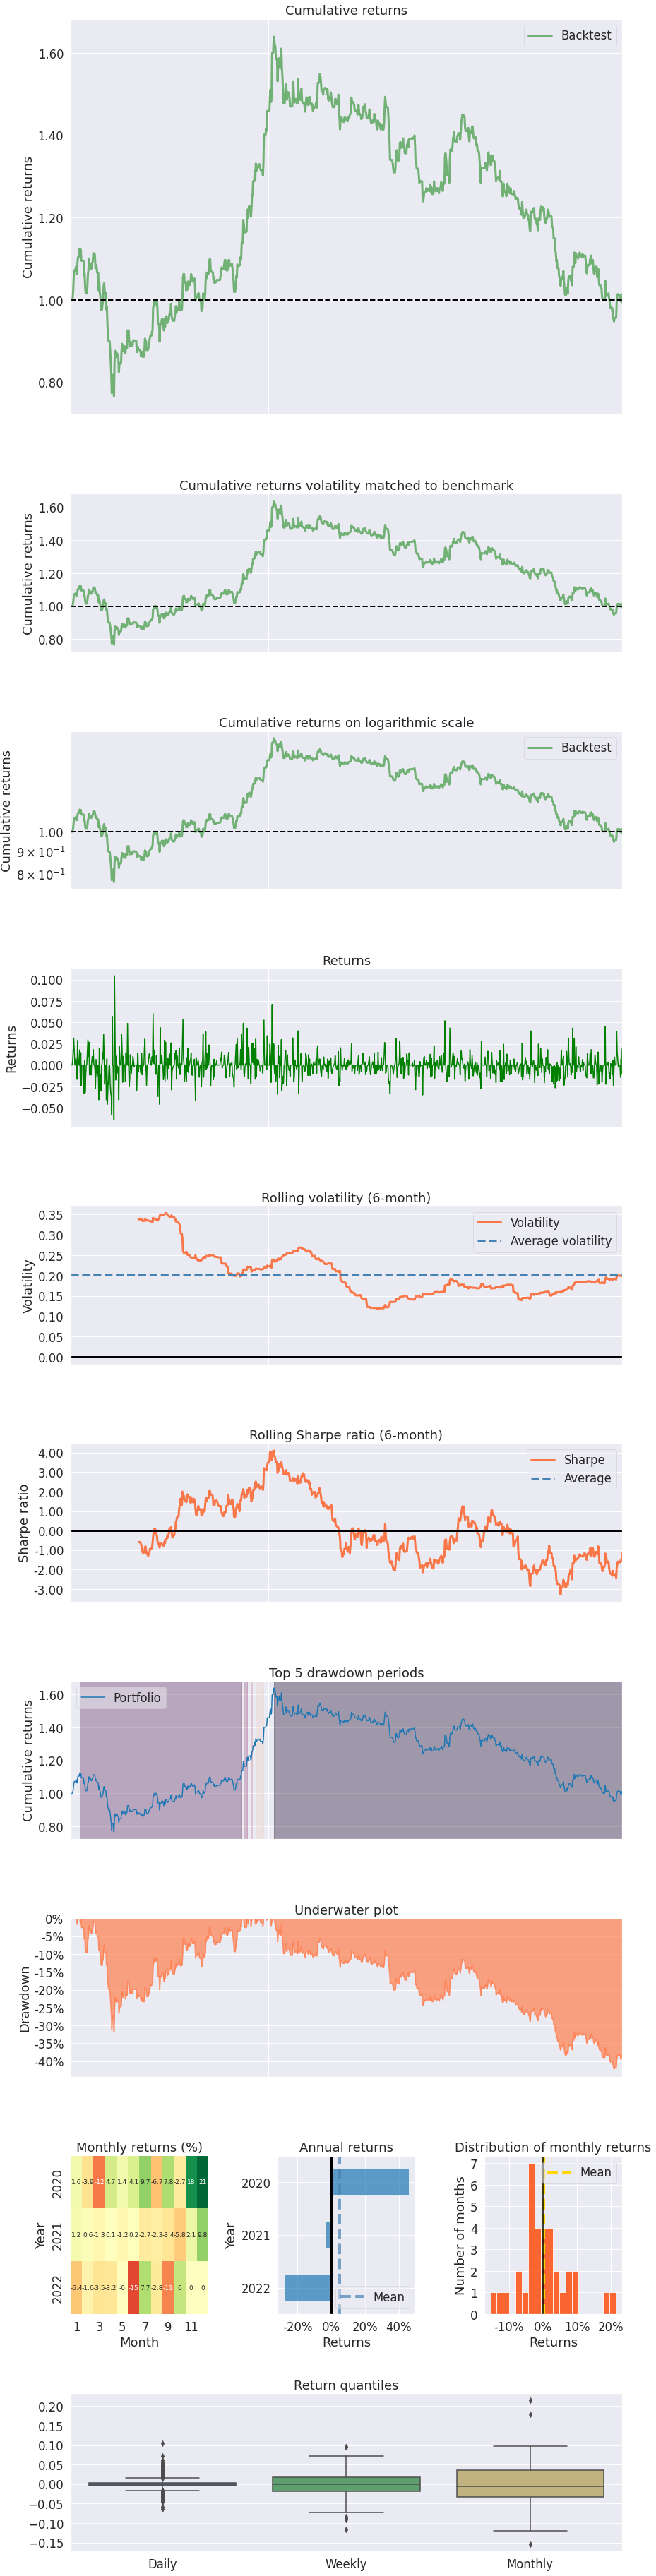

In [49]:
ret_df = staticAA('SS')

pf.create_returns_tear_sheet(ret_df)

<AxesSubplot:xlabel='Date'>

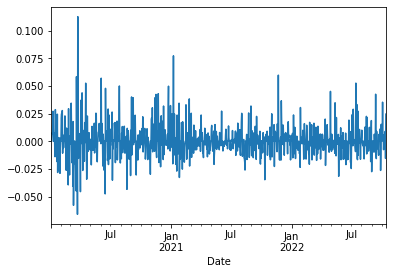

In [47]:
ret_df.plot()